In [ ]:
import tensorflow as tf 

#get dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
#neural net
neural_net = tf.keras.Sequential()
neural_net.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(10, activation='softmax'))

neural_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training
neural_net.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy'])

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

model_history = neural_net.fit(x_train, y_train, validation_split=.2, batch_size=32, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5089 - accuracy: 0.8540 - val_loss: 0.2819 - val_accuracy: 0.9212
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9264 - val_loss: 0.2185 - val_accuracy: 0.9377
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2155 - accuracy: 0.9371 - val_loss: 0.2044 - val_accuracy: 0.9423
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1911 - accuracy: 0.9453 - val_loss: 0.1893 - val_accuracy: 0.9458
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1742 - accuracy: 0.9491 - val_loss: 0.1823 - val_accuracy: 0.9478
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1625 - accuracy: 0.9527 - val_loss: 0.1707 - val_accuracy: 0.9522
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1528 - accuracy: 0.9543 - val_loss: 0.1723 - val_accuracy:

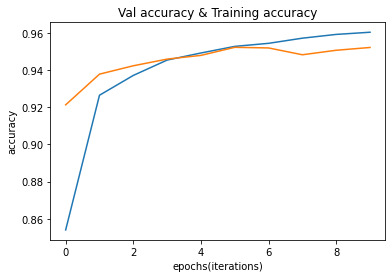

In [ ]:
import matplotlib.pyplot as plt

#accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Val accuracy & Training accuracy')

plt.xlabel('epochs(iterations)')
plt.ylabel('accuracy')
plt.show()

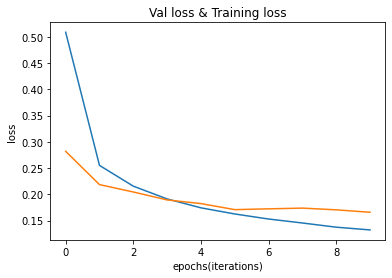

In [ ]:
#loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Val loss & Training loss')

plt.xlabel('epochs(iterations)')
plt.ylabel('loss')
plt.show()

In [ ]:
predictions = neural_net.predict([x_test])

In [ ]:
import random as rand
import numpy as np 

randomIndex = rand.randint(0, 10000)

print("predicted value is: ", np.argmax(predictions[randomIndex]))

predicted value is:  5


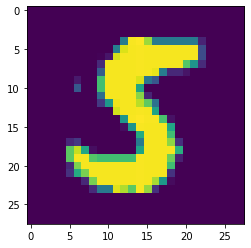

In [ ]:
plt.imshow(x_test[randomIndex])
plt.show()

In [ ]:
def get_indices_labeled_as(label): #gets all indices of a particular label
    indices = []
    for index, n in enumerate(y_test):
      if n == label:
        indices.append(index)

    return indices

In [ ]:
#number of images labeled as six
sixes_indices = get_indices_labeled_as(6)

print("number of sixes: ",len(sixes_indices))

number of sixes:  958


In [ ]:
#among all images labeled as six how many are 0 - 9
digit_to_count = {}
current_digit = 0

while current_digit < 10:
  count = 0
  for n in sixes_indices:
    if np.argmax(predictions[n]) == current_digit:
      count += 1
  
  digit_to_count[current_digit] = count

  current_digit += 1

print(digit_to_count)

{0: 11, 1: 3, 2: 5, 3: 0, 4: 4, 5: 6, 6: 924, 7: 0, 8: 5, 9: 0}
